The dataset I worked with provided intriguing insights into Population Diversity and Ethnicities. The primary objective of this analysis was to discern the various ethnic groups present in the area. Ethnic data holds significant importance for businesses, policymakers, and social researchers as it provides a deep understanding of the population they are catering to. This knowledge is pivotal for tailoring services, refining marketing strategies, and shaping policies that resonate with the diverse ethnic and cultural groups within a community.

My focus was on spotlighting the top 10 jurisdictions with the highest number of participants. Upon diving deeper, it emerged that the jurisdiction with the highest participant count predominantly comprised white non-Hispanic citizens, with very few individuals from other ethnic backgrounds. This information is crucial for developing nuanced community policies, offering a clear picture of the residents and aiding in the creation of targeted initiatives that cater to the specific needs of the citizens in that area.


In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px



df = pd.read_csv("/content/Demographic_Statistics_By_Zip_Code.csv")  #Reading CSV


In [236]:
#Cleaning data, dropping off unnecessary columns with all zero values

to_drop = ['COUNT GENDER UNKNOWN', 'PERCENT GENDER UNKNOWN',
           'COUNT CITIZEN STATUS UNKNOWN', 'PERCENT CITIZEN STATUS UNKNOWN',
           'COUNT PUBLIC ASSISTANCE UNKNOWN', 'PERCENT PUBLIC ASSISTANCE UNKNOWN']

df.drop(to_drop, inplace=True, axis=1)

# making all columns labels into string
df.columns = list(map(str, df.columns))

In [237]:
#Setting index  and sorting Jurisdiction according to the highest number of participants

df.set_index('JURISDICTION NAME', inplace=True)

participants = list(map(str, range(0, 300)))

df_sort = df.sort_values(by='COUNT PARTICIPANTS', ascending=False)

#Top 10 Jurisdiction where no of participants were highest

df_top = df_sort.head(10)
df_top

,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT PACIFIC ISLANDER,PERCENT PACIFIC ISLANDER,COUNT HISPANIC LATINO,...,COUNT OTHER CITIZEN STATUS,PERCENT OTHER CITIZEN STATUS,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
JURISDICTION NAME,,,,,,,,,,,,,,,,,,,,,
12789,272,115,0.42,157,0.58,272,100,0,0.00,0,...,0,0.00,272,100,70,0.26,202,0.74,272,100
12734,252,170,0.67,82,0.33,252,100,0,0.00,0,...,0,0.00,252,100,61,0.24,191,0.76,252,100
11230,248,194,0.78,54,0.22,248,100,0,0.00,1,...,0,0.00,248,100,42,0.17,206,0.83,248,100
12779,242,183,0.76,59,0.24,242,100,0,0.00,0,...,0,0.00,242,100,155,0.64,87,0.36,242,100
11219,214,182,0.85,32,0.15,214,100,0,0.00,1,...,0,0.00,214,100,112,0.52,102,0.48,214,100
12783,201,66,0.33,135,0.67,201,100,0,0.00,0,...,0,0.00,201,100,77,0.38,124,0.62,201,100
12754,134,64,0.48,70,0.52,134,100,2,0.01,0,...,0,0.00,134,100,27,0.20,107,0.80,134,100
12428,124,74,0.60,50,0.40,124,100,2,0.02,1,...,0,0.00,124,100,71,0.57,53,0.43,124,100
11218,111,97,0.87,14,0.13,111,100,0,0.00,1,...,1,0.01,111,100,51,0.46,60,0.54,111,100


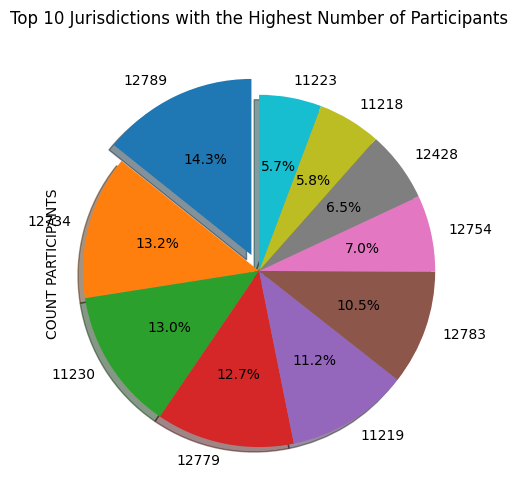

In [238]:
#Creating a pie plot of the top 10 Jurisdictions with the highest number of Participants


explode = (0.1, 0, 0, 0, 0 , 0 , 0 , 0 , 0 , 0)

df_top['COUNT PARTICIPANTS'].plot(kind='pie',
                            figsize=(5, 6),
                            explode = explode,
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True
                            )

plt.title('Top 10 Jurisdictions with the Highest Number of Participants')
plt.axis('equal')

plt.show()

In [239]:
#Further selecting the dataset to understand the Ethnic diversity

df_eth = df_top [['COUNT PACIFIC ISLANDER', 'COUNT HISPANIC LATINO',
                'COUNT AMERICAN INDIAN', 'COUNT ASIAN NON HISPANIC', 'COUNT WHITE NON HISPANIC',
                'COUNT BLACK NON HISPANIC', 'COUNT OTHER ETHNICITY', 'COUNT ETHNICITY UNKNOWN']]
df_eth

,COUNT PACIFIC ISLANDER,COUNT HISPANIC LATINO,COUNT AMERICAN INDIAN,COUNT ASIAN NON HISPANIC,COUNT WHITE NON HISPANIC,COUNT BLACK NON HISPANIC,COUNT OTHER ETHNICITY,COUNT ETHNICITY UNKNOWN
JURISDICTION NAME,,,,,,,,
12789,0,0,0,0,262,0,6,4
12734,0,0,0,0,243,0,4,5
11230,0,1,0,7,216,2,17,5
12779,0,0,0,0,239,0,3,0
11219,0,1,0,1,205,0,6,1
12783,0,0,2,0,195,0,3,1
12754,2,0,0,0,127,0,4,1
12428,2,1,0,0,117,0,4,0
11218,0,1,0,3,95,6,6,0


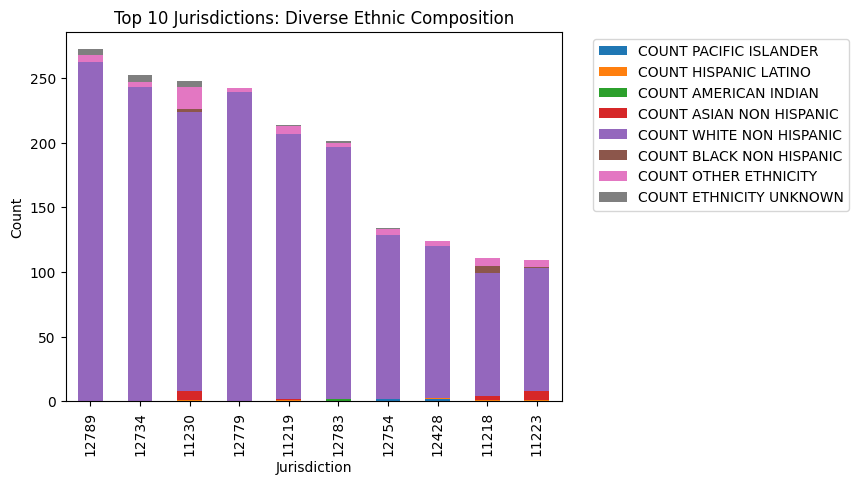

In [240]:
#Creating a stacked bar chart to understand the different ethnic groups and plotting the Top 10 Jurisdictions

ax = df_eth.plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.xlabel("Jurisdiction")

# setting y_label as price
plt.ylabel("Count")
plt.title("Top 10 Jurisdictions: Diverse Ethnic Composition")
plt.show()